<a href="https://colab.research.google.com/github/RenanNB360/Transformers-Pipeline/blob/main/Translation_Transformers_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip

--2023-12-18 22:24:45--  https://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.207, 74.125.143.207, 108.177.119.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2638744 (2.5M) [application/zip]
Saving to: ‘spa-eng.zip’

spa-eng.zip         100%[===================>]   2.52M  4.36MB/s    in 0.6s    

2023-12-18 22:24:46 (4.36 MB/s) - ‘spa-eng.zip’ saved [2638744/2638744]



In [2]:
!unzip -nq spa-eng.zip

In [3]:
!ls

sample_data  spa-eng  spa-eng.zip


In [4]:
ls spa-eng

_about.txt  spa.txt


In [5]:
!head spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


In [6]:
eng2spa = {}
for line in open('spa-eng/spa.txt'):
  line = line.rstrip()
  eng, spa = line.split('\t')
  if eng not in eng2spa:
    eng2spa[eng] = []
  eng2spa[eng].append(spa)

In [7]:
len(eng2spa.items())

102904

In [8]:
for i, c in enumerate(eng2spa.items()):
  if i < 5 :
    print(c)
  else:
    break

('Go.', ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'])
('Hi.', ['Hola.'])
('Run!', ['¡Corre!'])
('Run.', ['Corred.'])
('Who?', ['¿Quién?'])


In [9]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [10]:
from nltk.tokenize import RegexpTokenizer

In [11]:
tokenizer = RegexpTokenizer(r'\w+')

In [12]:
tokenizer.tokenize('¿Qué me cuentas?'.lower())

['qué', 'me', 'cuentas']

In [13]:
tokens = tokenizer.tokenize('¿Qué me cuentas?'.lower())
sentence_bleu([tokens], tokens)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.2213386697554703e-77

In [14]:
sentence_bleu([['hi']], ['hi'])

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.821831989445342e-231

In [15]:
smoother = SmoothingFunction()
sentence_bleu(['hi'], 'hi', smoothing_function=smoother.method4)

0.2213885886251307

In [16]:
sentence_bleu(['hi there'.split()], 'hi there'.split())

1.491668146240062e-154

In [17]:
sentence_bleu(['hi there friend'.split()], 'hi there friend'.split())

1.2213386697554703e-77

In [18]:
sentence_bleu([[1,2,3,4]], [1,2,3,4])

1.0

In [19]:
eng2spa_tokens = {}
for eng, spa_list in eng2spa.items():
  spa_list_tokens = []
  for text in spa_list:
    tokens = tokenizer.tokenize(text.lower())
    spa_list_tokens.append(tokens)
  eng2spa_tokens[eng] = spa_list_tokens

In [20]:
!pip install transformers sentencepiece transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.5 MB/s eta 0:00:00


In [21]:
from transformers import pipeline
translator = pipeline('translation', model = 'Helsinki-NLP/opus-mt-en-es', device = 0)

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [24]:
translator('I like eggs and ham')

[{'translation_text': 'Me gustan los huevos y el jamón.'}]

In [25]:
eng_phrases = list(eng2spa.keys())
len(eng_phrases)

102904

In [26]:
eng_phrases_subset = eng_phrases[20_000:21_000]

In [27]:
translations = translator(eng_phrases_subset)

In [28]:
translations[0]

{'translation_text': 'Tom está en el jardín.'}

In [29]:
scores = []
for eng, pred in zip(eng_phrases_subset, translations):
  matches = eng2spa_tokens[eng]

  spa_pred = tokenizer.tokenize(pred['translation_text'].lower())

  score = sentence_bleu(matches, spa_pred)
  scores.append(score)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

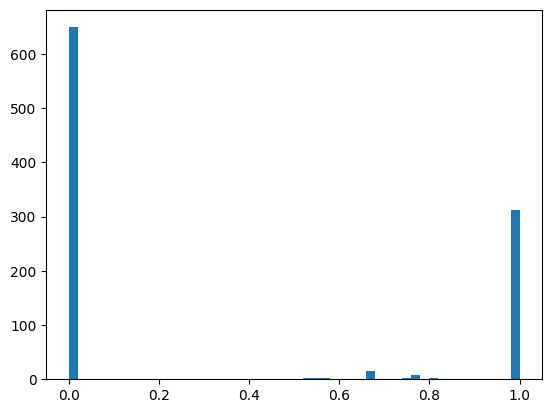

In [30]:
import matplotlib.pyplot as plt
plt.hist(scores, bins = 50);

In [31]:
import numpy as np
np.mean(scores)

0.3383504014386889

In [32]:
np.random.seed(1)

In [37]:
def print_random_translations():
  i = np.random.choice(len(eng_phrases_subset))
  eng = eng_phrases_subset[i]
  print("EN:", eng)

  translation = translations[i]['translation_text']
  print('ES Translation:', translation)

  matches = eng2spa[eng]
  print('Matches:', matches)

In [38]:
print_random_translations()

EN: Tom isn't that young.
ES Translation: Tom no es tan joven.
Matches: ['Tom no es tan joven.']
